In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1-Data Exploration

In [6]:
#lets import the crime data and print them
crimedata=pd.read_csv('communitycrimedata.csv')
print(crimedata.shape)

(1994, 128)


In [7]:
#lets see the data
print(crimedata.head(5))

   state numeric county numeric community numeric communityname string  \
0              8              ?                 ?         Lakewoodcity   
1             53              ?                 ?          Tukwilacity   
2             24              ?                 ?         Aberdeentown   
3             34              5             81440  Willingborotownship   
4             42             95              6096    Bethlehemtownship   

   fold numeric  population numeric  householdsize numeric  \
0             1                0.19                   0.33   
1             1                0.00                   0.16   
2             1                0.00                   0.42   
3             1                0.04                   0.77   
4             1                0.01                   0.55   

   racepctblack numeric  racePctWhite numeric  racePctAsian numeric  ...  \
0                  0.02                  0.90                  0.12  ...   
1                  0.12       

In [15]:
#lets remove the non predictive attributes from the dataset which is state,country,community,community name,fold
crimedata = crimedata.drop(columns=['state numeric','county numeric','community numeric','communityname string','fold numeric'], axis=1)
crimedata.head()

,population numeric,householdsize numeric,racepctblack numeric,racePctWhite numeric,racePctAsian numeric,racePctHisp numeric,agePct12t21 numeric,agePct12t29 numeric,agePct16t24 numeric,agePct65up numeric,...,LandArea numeric,PopDens numeric,PctUsePubTrans numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,LemasPctOfficDrugUn numeric,PolicBudgPerPop numeric,ViolentCrimesPerPop numeric
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [22]:
#lets check the missing values of the data and their attribute names
from pandas import DataFrame

crimedata = crimedata.replace('?', np.nan)
missingattb = crimedata.columns[crimedata.isnull().any()]
print(missingattb)
print(missingattb.shape)

Index(['OtherPerCap numeric', 'LemasSwornFT numeric',
       'LemasSwFTPerPop numeric', 'LemasSwFTFieldOps numeric',
       'LemasSwFTFieldPerPop numeric', 'LemasTotalReq numeric',
       'LemasTotReqPerPop numeric', 'PolicReqPerOffic numeric',
       'PolicPerPop numeric', 'RacialMatchCommPol numeric',
       'PctPolicWhite numeric', 'PctPolicBlack numeric',
       'PctPolicHisp numeric', 'PctPolicAsian numeric',
       'PctPolicMinor numeric', 'OfficAssgnDrugUnits numeric',
       'NumKindsDrugsSeiz numeric', 'PolicAveOTWorked numeric',
       'PolicCars numeric', 'PolicOperBudg numeric',
       'LemasPctPolicOnPatr numeric', 'LemasGangUnitDeploy numeric',
       'PolicBudgPerPop numeric'],
      dtype='object')
(23,)


In [32]:
#lets look at the attributes with missing values

crimedata[missingattb[0:]].describe()

,OtherPerCap numeric,LemasSwornFT numeric,LemasSwFTPerPop numeric,LemasSwFTFieldOps numeric,LemasSwFTFieldPerPop numeric,LemasTotalReq numeric,LemasTotReqPerPop numeric,PolicReqPerOffic numeric,PolicPerPop numeric,RacialMatchCommPol numeric,...,PctPolicAsian numeric,PctPolicMinor numeric,OfficAssgnDrugUnits numeric,NumKindsDrugsSeiz numeric,PolicAveOTWorked numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,PolicBudgPerPop numeric
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.2,0.98,0.19,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


# 2-Data Cleaning

In [49]:
#So here we saw OtherPerCap numeric,PctPolicAsian numeric and LemasGangUnitDeploy numeric has only one missing value 
#so we will be fill those value by mean value 
# and the others attributes having many missing values and will be removed from the data set.
#using Imputer from sklearn.preprocessing. 
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(crimedata[missingattb])
crimedata[missingattb] = imputer.transform(crimedata[missingattb])
crimedata[missingattb].describe()

,OtherPerCap numeric,LemasSwornFT numeric,LemasSwFTPerPop numeric,LemasSwFTFieldOps numeric,LemasSwFTFieldPerPop numeric,LemasTotalReq numeric,LemasTotReqPerPop numeric,PolicReqPerOffic numeric,PolicPerPop numeric,RacialMatchCommPol numeric,...,PctPolicAsian numeric,PctPolicMinor numeric,OfficAssgnDrugUnits numeric,NumKindsDrugsSeiz numeric,PolicAveOTWorked numeric,PolicCars numeric,PolicOperBudg numeric,LemasPctPolicOnPatr numeric,LemasGangUnitDeploy numeric,PolicBudgPerPop numeric
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.284742,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,...,0.114859,0.259185,0.075549,0.556050,0.305987,0.163103,0.076708,0.698589,0.440439,0.195078
std,0.190960,0.055219,0.063883,0.052827,0.061932,0.064682,0.065758,0.078764,0.063888,0.090599,...,0.090814,0.090137,0.047995,0.081159,0.090628,0.085793,0.056005,0.085459,0.162099,0.065796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,...,0.114859,0.259185,0.075549,0.556050,0.305987,0.163103,0.076708,0.698589,0.440439,0.195078
50%,0.250000,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,...,0.114859,0.259185,0.075549,0.556050,0.305987,0.163103,0.076708,0.698589,0.440439,0.195078
75%,0.360000,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,...,0.114859,0.259185,0.075549,0.556050,0.305987,0.163103,0.076708,0.698589,0.440439,0.195078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#lets look at the attributes with missing values
missingattb1 = crimedata.columns[crimedata.isnull().any()]
print(missingattb1)
print(missingattb1.shape)

Index([], dtype='object')
(0,)


# 3-Data Visualization

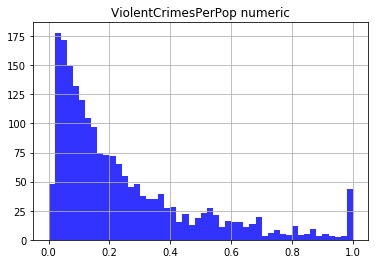

In [58]:
# Now lets see ViolentCrimesPerPop graph which to be predicted
crimedata.hist(column = ['ViolentCrimesPerPop numeric'], bins = 50, color = 'blue', alpha = 0.8)
plt.show()

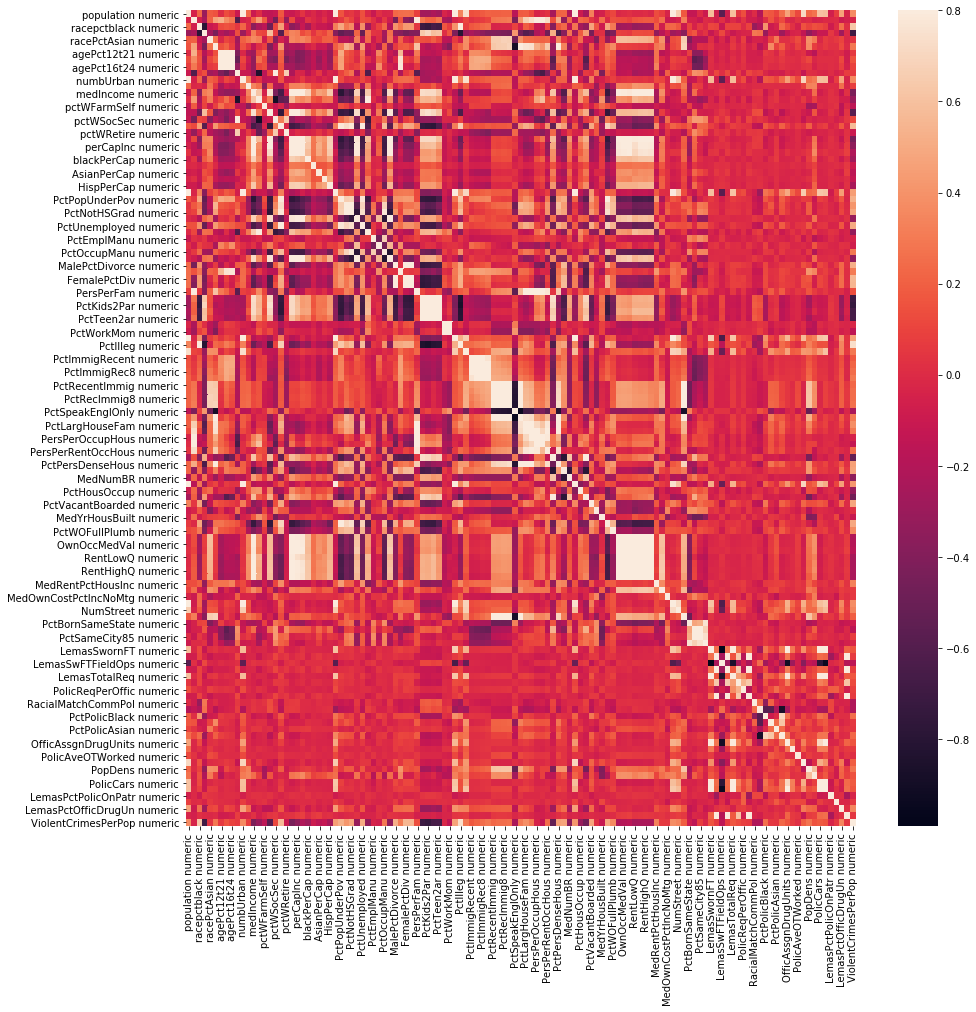

In [61]:
#lets check the corelartion
import seaborn as sns

corrmat = crimedata.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [60]:
#lets check the corelation between attributes and predict attributes 

corrT = crimedata.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop numeric'])
corrT['ViolentCrimesPerPop numeric']

PctKids2Par numeric           -0.7384
PctFam2Par numeric            -0.7067
racePctWhite numeric          -0.6848
PctYoungKids2Par numeric      -0.6661
PctTeen2ar numeric            -0.6616
                                ...  
FemalePctDiv numeric           0.5560
pctWPubAsst numeric            0.5747
racepctblack numeric           0.6313
PctIlleg numeric               0.7380
ViolentCrimesPerPop numeric    1.0000
Name: ViolentCrimesPerPop numeric, Length: 123, dtype: float64

# 4-Feature Engineering

In [63]:
#Here the dataset contain many variables highly correlated. 
# so multicolinearity will increase the model variance. 
# Dimensionality reduction utilizing PCA can provide an optimal set of orthogonal features. 
#Let's adopt the criterion in which we select those principal components responsible to explain 
#more than a unit variance ("eigenvalue one criterion").

# Hence we will separate both input and target attributes here


dx=crimedata.drop(columns=['ViolentCrimesPerPop numeric'],axis=1)
y=crimedata[['ViolentCrimesPerPop numeric']]

print(dx.shape)
print(y.shape)


(1994, 122)
(1994, 1)


In [67]:
# Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dx)


Amount of variance: [25.48663559 17.29416185 10.61641797  8.31439062  7.06616539  4.80589329
  4.19620807  3.77377836  3.06287831  2.5983113   2.09083295  1.82898165
  1.70012883  1.6103546   1.52153905  1.37973333  1.35477239  1.11076048
  1.05453007  1.03846438]
Sum of the variance: 101.9
Percentage of variance: [0.20880208 0.14168433 0.08697618 0.06811656 0.05789034 0.03937281
 0.0343779  0.0309171  0.02509297 0.02128695 0.01712938 0.01498413
 0.01392849 0.01319301 0.01246538 0.01130362 0.01109912 0.00910003
 0.00863935 0.00850773]
Sum of the percentage of variance: 0.83


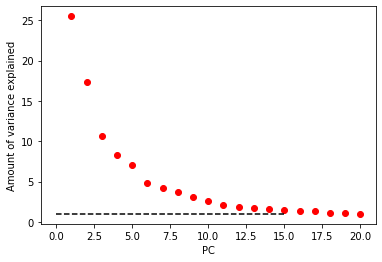

(1994, 20)


In [68]:
#lets apply the PCA technique

from sklearn.decomposition import PCA

c = 20
pca = PCA(n_components = c)
x = pca.fit_transform(x)


print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(x.shape)

# 5-Model Building

In [69]:
print(x.shape)
print(y.shape)

(1994, 20)
(1994, 1)


In [70]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso(alpha=0.1)
from sklearn.linear_model import Ridge
lrreg=Ridge(alpha=0.1)
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [71]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [74]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('Maximum R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 57


Maximum R2 Score is: 0.6864646190952477




************************ KNeighborsRegressor **********************


Final Random State is: 55


Maximum R2 Score is: 0.6337683517614245




************************ Lasso **********************


Final Random State is: 52


Maximum R2 Score is: 0.5472341839238213




************************ Ridge **********************


Final Random State is: 57


Maximum R2 Score is: 0.6864646548231718




************************ GradientBoostingRegressor **********************


Final Random State is: 99


Maximum R2 Score is: 0.6767641348193081




************************ AdaBoostRegressor **********************


Final Random State is: 96


Maximum R2 Score is: 0.5159091914649823




************************ RandomForestRegressor **********************


Final Random State is: 55


Maximum R2 Score is: 0.6734003553966035






In [75]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            57  68.646462
1        KNeighborsRegressor            55  63.376835
2                      Lasso            52  54.723418
3                      Ridge            57  68.646465
4  GradientBoostingRegressor            99  67.676413
5          AdaBoostRegressor            96  51.590919
6      RandomForestRegressor            55  67.340036


In [78]:
# So here Ridge Regression is the best model, so lets find out the best parameter for this
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
lrreg=Ridge()
parameters={'alpha':[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lrreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_


{'alpha': 1}

In [80]:
# So lets build the final model with alpha=1 and random_state=57

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=57)
lrreg=Ridge(alpha=1)
lrreg.fit(x_train,y_train)
y_pred=lrreg.predict(x_test)
print('r2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.6864649692730715
RMSE is: 0.13560317146880935


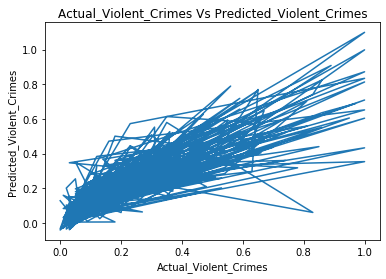

In [81]:
# so it seems there are above 68% violent crimes in US communities.
Actual_Crime=y_test
Predicted_Crime=y_pred
plt.title('Actual_Violent_Crimes Vs Predicted_Violent_Crimes')
plt.xlabel('Actual_Violent_Crimes')
plt.ylabel('Predicted_Violent_Crimes')
plt.plot(Actual_Crime, Predicted_Crime)
plt.show()

In [82]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lrreg,'lrreg_crime.obj')

['lrreg_crime.obj']

In [84]:
# load the model from the file
crime_from_joblib=joblib.load('lrreg_crime.obj')

In [85]:
#Use the loaded model to make predictionsdtc_from_joblib.predict(x_test)
crime_from_joblib.predict(x_test)

array([[ 3.61742065e-01],
       [ 6.07648666e-01],
       [ 1.67583308e-01],
       [ 4.32874315e-01],
       [ 7.12831302e-02],
       [ 2.98058149e-02],
       [ 1.68187801e-01],
       [ 9.91040218e-02],
       [ 2.82917639e-01],
       [ 5.61489534e-01],
       [ 2.80328810e-01],
       [ 3.24443894e-01],
       [ 1.49856522e-01],
       [ 7.08759342e-01],
       [ 9.38621649e-02],
       [ 3.57312782e-02],
       [ 3.12657238e-01],
       [ 5.52434109e-01],
       [ 3.01587875e-01],
       [ 3.50881139e-01],
       [ 6.04603052e-02],
       [ 2.45635580e-01],
       [ 4.28005468e-01],
       [ 3.22919105e-01],
       [ 8.54239472e-02],
       [ 2.84133055e-01],
       [ 9.98182717e-01],
       [ 2.03145711e-01],
       [ 1.28389362e-01],
       [ 2.44644375e-01],
       [ 6.31593976e-02],
       [ 1.34388743e-01],
       [ 5.85563887e-02],
       [ 2.92812487e-01],
       [ 3.60020778e-01],
       [ 3.32136952e-01],
       [ 3.90886615e-01],
       [ 7.64940639e-01],
       [ 1.5